<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=12)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 12}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)
from scipy.integrate import *
from scipy.interpolate import interp1d

In [2]:
#Data from Schwieterman et al. 2018
abiotic_CH4 = np.loadtxt('coantibiosignatureplot/abiotic_CH4.txt',delimiter = ',')
abiotic_CO = np.loadtxt('coantibiosignatureplot/abiotic_CO.txt',delimiter = ',')

hybrid_CH4 = np.loadtxt('coantibiosignatureplot/hybrid_CH4.txt',delimiter = ',')
hybrid_CO = np.loadtxt('coantibiosignatureplot/hybrid_CO.txt',delimiter = ',')

H2only_CH4 = np.loadtxt('coantibiosignatureplot/H2only_CH4.txt',delimiter = ',')
H2only_CO = np.loadtxt('coantibiosignatureplot/H2only_CO.txt',delimiter = ',')

#Data from Kharecha et al. 2005
K2005 = pd.read_csv('DatafromFig9_Kharecha2005.csv', names=['fH2','species'], delimiter=',')
K2005_CO = K2005[0:6]
K2005_CH4=K2005[6:12]

K2005_vH2 = {'fH2': [200, 500, 800, 2000, 5000, 10000], 'volc_flux': [6.32E9, 1.45E10, 2.25E10, 5.37E10, 1.30E11, 2.56E11]}
K2005_volH2 = pd.DataFrame(data=K2005_vH2)
K2005_volH2['volc_flux_molyr']=K2005_volH2['volc_flux']*(5.1E18/6.02E23)*(60*60*24*365)

K2005_CO_interp = np.interp(K2005_volH2.fH2, K2005_CO.fH2, K2005_CO.species)
K2005_CH4_interp = np.interp(K2005_volH2.fH2, K2005_CH4.fH2, K2005_CH4.species)

K2005_volH2['CO']=K2005_CO_interp
K2005_volH2['CH4']=K2005_CH4_interp
print(K2005_volH2)



     fH2     volc_flux  volc_flux_molyr          CO          CH4
0    200  6.320000e+09     1.688486e+12    5.560298    81.614008
1    500  1.450000e+10     3.873899e+12   20.980714   234.980015
2    800  2.250000e+10     6.011223e+12   35.928964   376.168948
3   2000  5.370000e+10     1.434678e+13   77.655651   909.110435
4   5000  1.300000e+11     3.473151e+13  133.807505  2403.869624
5  10000  2.560000e+11     6.839435e+13  168.069998  4537.981751


In [3]:
print(K2005_CO)
print(K2005_CO_interp)
print('')
print(K2005_CH4)
print(K2005_CH4_interp)

           fH2     species
0   201.024549    5.560298
1   501.604023   21.063445
2   805.632883   36.209584
3  2010.245495   78.011183
4  5016.040228  134.106856
5  9672.963896  168.069998
[  5.56029763  20.98071388  35.92896402  77.65565103 133.80750489
 168.06999845]

            fH2      species
6    201.024549    81.614008
7    501.604023   235.802834
8    805.632883   378.818668
9   2010.245495   913.659373
10  5016.040228  2411.864700
11  9672.963896  4537.981751
[  81.61400793  234.98001495  376.16894762  909.11043501 2403.86962436
 4537.98175114]


In [4]:
print(abiotic_CH4)
print('')
print(hybrid_CH4[:,0])

abiotic_CO_interp = np.interp(abiotic_CH4[:,0], abiotic_CO[:,0], abiotic_CO[:,1])
hybrid_CH4_interp = np.interp(abiotic_CH4[:,0], hybrid_CH4[:,0], hybrid_CH4[:,1])
hybrid_CO_interp = np.interp(abiotic_CH4[:,0], hybrid_CO[:,0], hybrid_CO[:,1])
H2only_CH4_interp = np.interp(abiotic_CH4[:,0], H2only_CH4[:,0], H2only_CH4[:,1])
H2only_CO_interp = np.interp(abiotic_CH4[:,0], H2only_CO[:,0], H2only_CO[:,1])


print('')
print(abiotic_CO_interp)

[[1.32248521e+11 2.51508395e-06]
 [2.09588188e+11 2.68025920e-06]
 [3.42283733e+11 2.85628214e-06]
 [4.48490805e+11 3.04386519e-06]
 [6.56083210e+11 3.14222709e-06]
 [1.03973555e+12 3.45679825e-06]
 [1.68101079e+12 3.92575011e-06]
 [2.69065661e+12 4.60239009e-06]
 [4.66595631e+12 5.22675381e-06]
 [8.33785864e+12 6.12763401e-06]
 [1.32138845e+13 6.53005933e-06]
 [2.03229631e+13 6.53005933e-06]
 [2.94320534e+13 7.18378939e-06]
 [5.36619075e+13 7.65557650e-06]]

[1.32735848e+11 2.10372142e+11 3.30086979e+11 4.50193262e+11
 6.26454110e+11 1.02310623e+12 1.67086048e+12 2.72879968e+12
 4.54685166e+12 8.45746036e+12 1.32680797e+13 1.98009069e+13
 2.81021075e+13 5.38551798e+13]

[8.17933893e-06 8.44475067e-06 8.90582781e-06 9.37251964e-06
 1.00414303e-05 1.17100018e-05 1.42562585e-05 1.90047180e-05
 3.03789646e-05 5.04273830e-05 8.01815418e-05 1.21992791e-04
 1.75520172e-04 3.14261515e-04]


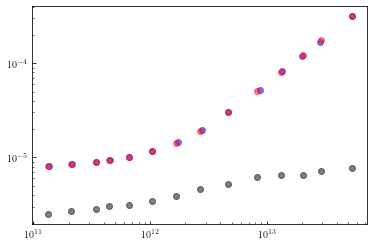

In [5]:
#Checking interpolation
plt.figure()
plt.loglog(abiotic_CO[:,0], abiotic_CO[:,1], 'bo', alpha=0.5)
plt.loglog(abiotic_CH4[:,0], abiotic_CO_interp, 'ro', alpha=0.5)
plt.loglog(abiotic_CH4[:,0], abiotic_CH4[:,1], 'ko', alpha=0.5)

plt.show()

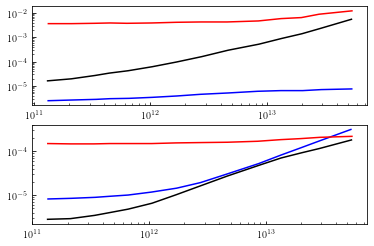

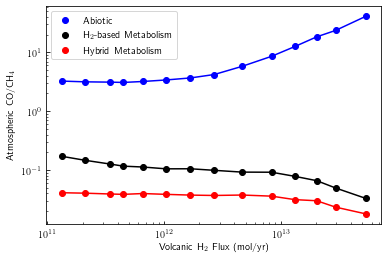

In [6]:
plt.figure()
plt.subplot(2,1,1)
plt.loglog(abiotic_CH4[:,0],abiotic_CH4[:,1],'b')
plt.loglog(H2only_CH4[:,0],H2only_CH4[:,1],'k')
plt.loglog(hybrid_CH4[:,0],hybrid_CH4[:,1],'r')
plt.subplot(2,1,2)
plt.loglog(abiotic_CO[:,0],abiotic_CO[:,1],'b')
plt.loglog(H2only_CO[:,0],H2only_CO[:,1],'k')
plt.loglog(hybrid_CO[:,0],hybrid_CO[:,1],'r')
plt.show()

plt.figure()
plt.loglog(abiotic_CH4[:,0],abiotic_CO[:,1]/abiotic_CH4[:,1],'bo',label='Abiotic')
plt.loglog(abiotic_CH4[:,0],H2only_CO[:,1]/H2only_CH4[:,1],'ko',label=r'H$_2$-based Metabolism')
plt.loglog(abiotic_CH4[:,0],hybrid_CO[:,1]/hybrid_CH4[:,1],'ro',label = 'Hybrid Metabolism')
plt.loglog(abiotic_CH4[:,0],abiotic_CO[:,1]/abiotic_CH4[:,1],'b')
plt.loglog(abiotic_CH4[:,0],H2only_CO[:,1]/H2only_CH4[:,1],'k')
plt.loglog(abiotic_CH4[:,0],hybrid_CO[:,1]/hybrid_CH4[:,1],'r')
plt.xlabel(r'Volcanic H$_2$ Flux (mol/yr)')
plt.ylabel(r'Atmospheric CO/CH$_4$')
plt.legend()
plt.show()


In [7]:
#Data from Sauterey et al. 2020
MG_AG_AT_Low = 0.029261200154099845
MG_AG_AT_Hi = 0.4426570808900494
MG_AG_AT_MT_Low= 0.031216342887834397
MG_AG_AT_MT_Hi = 0.652539403439528
MG_AG_Low= 0.05960475385927144
MG_AG_Hi = 181.31217442077474

Abiotic_Low= 38.394557167789046
Abiotic_Hi= 6358.735883754542
AG_AT_Low= 0.06783606914108317
AG_AT_Hi = 0.41493257202147193


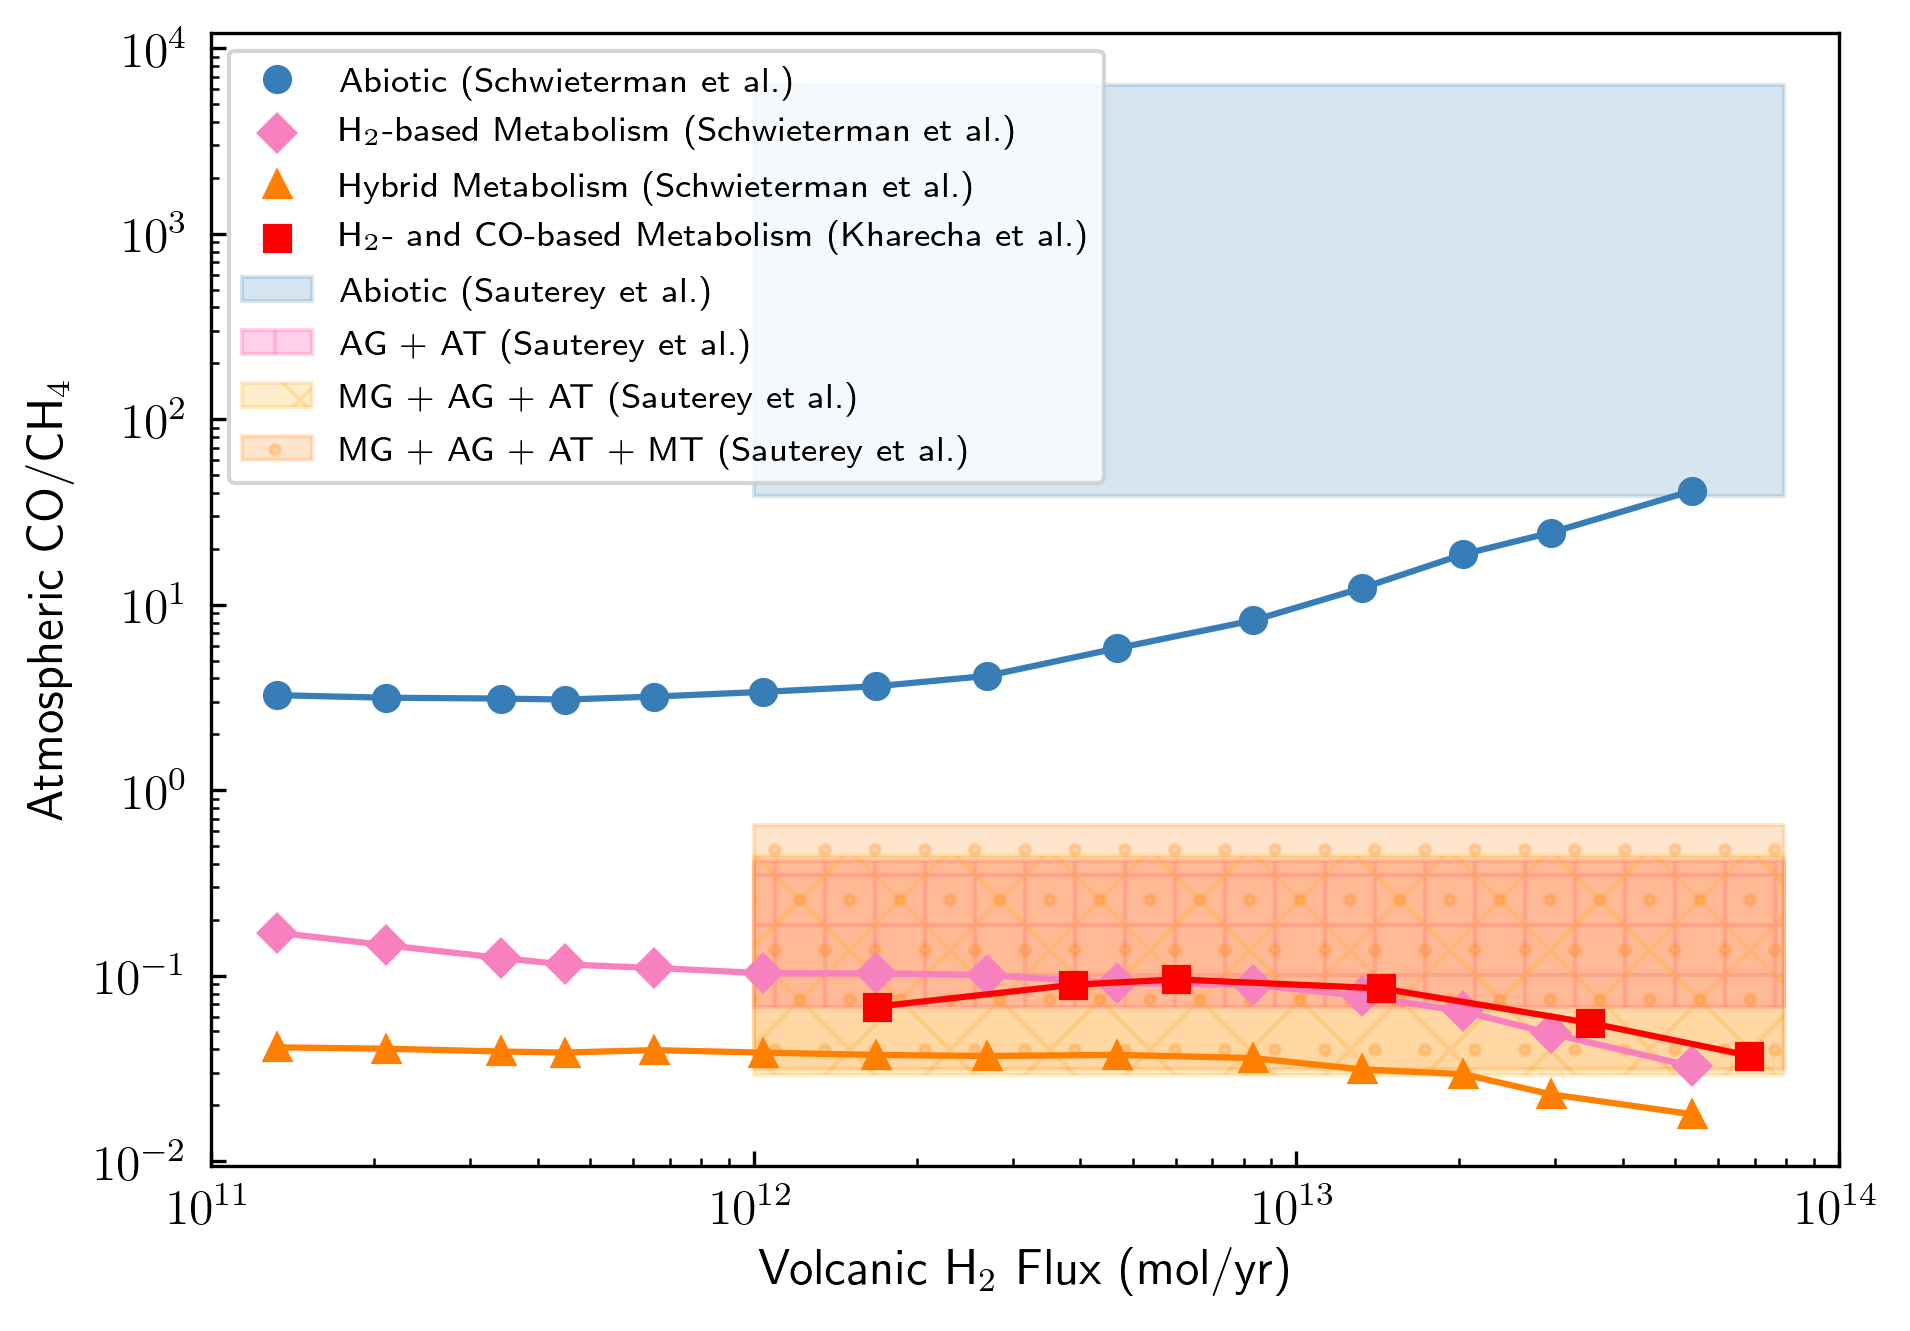

In [13]:
xaxis_arr = np.logspace(12,13.9,10)

plt.figure()
plt.fill_between(xaxis_arr, Abiotic_Low, Abiotic_Hi, color='#377eb8', alpha=0.2, label='Abiotic (Sauterey et al.)')
#plt.fill_between(xaxis_arr, 1.809, 74.860, color='darkviolet', alpha=0.2)
plt.fill_between(xaxis_arr, AG_AT_Low, AG_AT_Hi, color='hotpink', hatch="+", alpha=0.3, label='AG + AT (Sauterey et al.)')
plt.fill_between(xaxis_arr, MG_AG_AT_Low, MG_AG_AT_Hi, color='orange', hatch="X", alpha=0.2, label='MG + AG + AT (Sauterey et al.)')
plt.fill_between(xaxis_arr, MG_AG_AT_MT_Low, MG_AG_AT_MT_Hi, color='#ff7f00', hatch=".", alpha=0.2, label='MG + AG + AT + MT (Sauterey et al.)')

plt.loglog(abiotic_CH4[:,0],abiotic_CO_interp/abiotic_CH4[:,1],'o', color='#377eb8', label='Abiotic (Schwieterman et al.)')
plt.loglog(abiotic_CH4[:,0],H2only_CO_interp/H2only_CH4_interp,'D', color='#f781bf', label=r'H$_2$-based Metabolism (Schwieterman et al.)')
plt.loglog(abiotic_CH4[:,0],hybrid_CO_interp/hybrid_CH4_interp,'^', color='#ff7f00', label = 'Hybrid Metabolism (Schwieterman et al.)')
plt.loglog(abiotic_CH4[:,0],abiotic_CO_interp/abiotic_CH4[:,1],color='#377eb8')
plt.loglog(abiotic_CH4[:,0],H2only_CO_interp/H2only_CH4_interp,color='#f781bf')
plt.loglog(abiotic_CH4[:,0],hybrid_CO_interp/hybrid_CH4_interp,color='#ff7f00')

plt.loglog(K2005_volH2.volc_flux_molyr, K2005_volH2.CO/K2005_volH2.CH4, 's', color='red', label=r'H$_2$- and CO-based Metabolism (Kharecha et al.)')
plt.loglog(K2005_volH2.volc_flux_molyr, K2005_volH2.CO/K2005_volH2.CH4, color='red')

plt.xlim(1e11, 1e14)
plt.xlabel(r'Volcanic H$_2$ Flux (mol/yr)')
plt.ylabel(r'Atmospheric CO/CH$_4$')
plt.legend(fontsize='x-small', loc=2)
plt.savefig('COAntibiosigs.jpg', dpi=1000)
plt.show()

In [9]:
print(np.mean(abiotic_CO_interp/abiotic_CH4[:,1]))
print(np.mean(H2only_CO_interp/H2only_CH4_interp))
print(np.mean(hybrid_CO_interp/hybrid_CH4_interp))

9.816358695480115
0.09830077869077931
0.0347330667955611


In [10]:
print(np.mean(abiotic_CO_interp/abiotic_CH4[:,1])/np.mean(H2only_CO_interp/H2only_CH4_interp))
print(np.mean(abiotic_CO_interp/abiotic_CH4[:,1])/np.mean(hybrid_CO_interp/hybrid_CH4_interp))

99.86043677597945
282.6228606088608
